# TP3 : Chaînes de Markov à espace d'états fini

**Élève 1 :**

- Nom :
- Prénom :
- N° étudiant :

**Élève 2 :**

- Nom :
- Prénom :
- N° étudiant :

**Barème approximmatif :**

- Toutes les questions ont la même importance.
- La lisibilité du code (présence de commentaires notamment) sera évaluée.

**Consignes :**

- Le travail à deux est autorisé, du moment que les deux élèves sont clairement signalés ci-avant et qu'un seul document est rendu.

- Chaque question est suivie d'un bloc (de code ou de texte) dans lequel écrire la réponse attendue.

- L'usage de la documentation en ligne est autorisé *et encouragé*.

- Il est attendu que le code rendu puisse s'exécuter de A à Z en faisant un `Kernel > Restart & Run All`. Si des portions de votre code posent problème sans que vous arriviez à résoudre le bug, commentez-les et essayez d'expliquer selon vous quel est le problème et comment le résoudre.

- On se restreindra aux bibliothèques python suivantes :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## Exercice 1 : Étude d'une loi invariante

### Partie 1 : Temps d'occupation sur une trajectoire

1. Écrire une fonction `tirage(x,P)` qui prend une matrice stochastique $P$ de taille $n$ en entrée, un élément $0\leq x < n$,
et retourne un successeur de $x$ pour la chaîne de Markov associée, en suivant la loi donnée par la $x$-ième ligne de $P$. On pourra pour ce faire utiliser la fonction [`rnd.choices`](https://docs.python.org/3.6/library/random.html#random.choices).

In [2]:
def tirage(x,P):
    n = np.shape(P)[1]
    pop = range(n)
    w = P[x].tolist()[0]
    return rnd.choices(population=pop,weights=w)[0]

2. En utilisant la fonction `tirage` de la question précédente, écrire une fonction `trajectoire(P,n)` qui retourne un tirage de la chaîne $\left(X_k\right)_{0\leq k \leq n}$ jusqu'au temps $n$ (initialisée en $X_0=0$).

In [3]:
def trajectoire(P,n):
    X=[0]
    for t in range(n):
        X.append(tirage(X[-1],P))
    return X

3. Écrire une fonction `visites(X,k)` qui, à partir de la trajectoire (finie) $X$, retourne une liste `L` de longueur `k` où `L[j]` contient le nombre d'occurrences de l'entier $0\leq j<k$ dans la trajectoire $X$.

In [4]:
def visites(X,k):
    L=[0]*k
    for x in X:
        if x<k:
            L[x]+=1
    return L

4. En utilisant les fonctions `trajectoire` et `visites`, écrire une fonction `occupation(P,n)` qui retourne la proportion du temps passé sur chaque état pour une trajectoire jusqu'au temps $n$ de la chaîne de Markov induite par $P$.

In [5]:
def occupation(P,n):
    k=np.shape(P)[1]
    X=trajectoire(P,n)
    L=visites(X,k)
    return [l/(n+1) for l in L]

### Partie 2 : Loi d'une variable et mesure invariante

On considère désormais la chaîne de Markov $\left(X_n\right)$ à trois états $\{0,1,2\}$, initialisée en $X_0=0$,
de matrice de transition suivante :

$$Q = \begin{pmatrix}\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \newline
                     \frac{2}{3} & 0           & \frac{1}{3} \newline
                     \frac{2}{3} & \frac{1}{3} & 0 \end{pmatrix}$$

1. Implémenter cette matrice $Q$ en utilisant [`np.matrix`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html).

In [6]:
Q=np.matrix([[1/3,1/3,1/3],[2/3,0,1/3],[2/3,1/3,0]])
print(Q.round(2))

[[0.33 0.33 0.33]
 [0.67 0.   0.33]
 [0.67 0.33 0.  ]]


2. En utilisant l'exponentiation matricielle, écrire une fonction `loi(P,n)` qui retourne la loi de $X_n$ pour la chaîne de Markov de noyau $P$ initialisée en $X_0=0$.

In [7]:
def loi(P,n):
    return (P**n)[0]

3. La matrice $Q$ de la question 1. est-elle irréductible ? apériodique ? Justifier.

In [8]:
print(Q**2)

[[0.55555556 0.22222222 0.22222222]
 [0.44444444 0.33333333 0.22222222]
 [0.44444444 0.22222222 0.33333333]]


On constate que $Q^2$ est sans zéros, donc $Q$ est irréductible et apériodique.

4. On rappelle que lorsqu'une chaîne de Markov est irréductible apériodique, elle converge vers son unique loi invariante. Écrire un algorithme `loi_invariante(P)` qui, étant donné une matrice stochastique $P$ irréductible apériodique, retourne cette loi invariante $V$ sous forme d'un vecteur ligne. On pourra pour ce faire utiliser une boucle `while` avec la condition d'arrêt `np.linalg.norm(V-V*P)<10**-8`.

In [9]:
def loi_invariante(P):
    V=np.matrix([[1,0,0]])
    while np.linalg.norm(V-V*P)>10**-8:
        P=P*P
        V=V*P
    return V

5. Comparer la loi invariante pour la matrice $Q$ avec les lois empiriques données par `occupation(Q,n)` pour diverses valeurs de $n$, en affichant notamment la distance euclidienne entre les vecteurs avec `np.linalg.norm`.

In [10]:
V = loi_invariante(Q)
print("Loi invariante : "+str([v for v in V.round(3)[0]]))

pow = 8
k   = 5

j=1
for i in range(pow):
    j=k*j
    W=np.array(occupation(Q,j))
    print("\nTemps n = "+str(j))
    print("Loi d'occupation empirique   : "+str(W.round(3)))
    print("Distance à la loi invariante : "+str(np.linalg.norm(V-W).round(5)))

Loi invariante : [0.5, 0.25, 0.25]

Temps n = 5
Loi d'occupation empirique   : [0.667 0.167 0.167]
Distance à la loi invariante : 0.20412

Temps n = 25
Loi d'occupation empirique   : [0.5   0.269 0.231]
Distance à la loi invariante : 0.0272

Temps n = 125
Loi d'occupation empirique   : [0.492 0.302 0.206]
Distance à la loi invariante : 0.06804

Temps n = 625
Loi d'occupation empirique   : [0.484 0.252 0.264]
Distance à la loi invariante : 0.0211

Temps n = 3125
Loi d'occupation empirique   : [0.508 0.25  0.242]
Distance à la loi invariante : 0.01165

Temps n = 15625
Loi d'occupation empirique   : [0.505 0.248 0.247]
Distance à la loi invariante : 0.00574

Temps n = 78125
Loi d'occupation empirique   : [0.499 0.252 0.25 ]
Distance à la loi invariante : 0.0021

Temps n = 390625
Loi d'occupation empirique   : [0.501 0.25  0.249]
Distance à la loi invariante : 0.00077


6. Que pouvez-vous en conclure ? Quel résultat admis dans le cours garantit ce constat empirique ?

On constate une convergence des temps d'occupation empirique vers la mesure invariante. Ce constat correspond à un cas particulier du théorème ergodique.

## Exercice 2 : Trajectoires d'une marche aléatoire $\newcommand{Z}{\mathbb{Z}}\newcommand{Pr}{\mathbb{P}}\newcommand{E}{\mathbb{E}}$

Soit $\left(X_n\right)$ une marche aléatoire initialisée en $X_0=0$, telle que $\Pr\left(X_{n+1}=X_n+1\right)=p$ et $\Pr\left(X_{n+1}=X_n-1\right)=1-p$ pour un paramètre $0<p<1$ fixé. La marche $\left(X_n\right)$ est *a fortiori* une chaîne de Markov sur l'espace d'états dénombrable $\Z$.

1. Écrire une fonction `pas(p)` qui retourne un entier aléatoire dans $\{\pm 1\}$, égal à $1$ avec probabilité $p$ et $-1$ avec probabilité $1-p$.

In [11]:
def pas(p):
    return rnd.choices([1,-1],[p,1-p])[0]

2. Quelle est l'espérance de la variable aléatoire $X_n$ ?

On a $\E\left[X_n\right]=n(2p-1)$.

3. Écrire une fonction `marche(p,n)` qui, étant donnée une valeur du paramètre $p$, trace la trajectoire de la chaîne jusqu'au rang $n$. On superposera à cette trajectoire la droite d'équation $y=\E\left[X_1\right]x$.

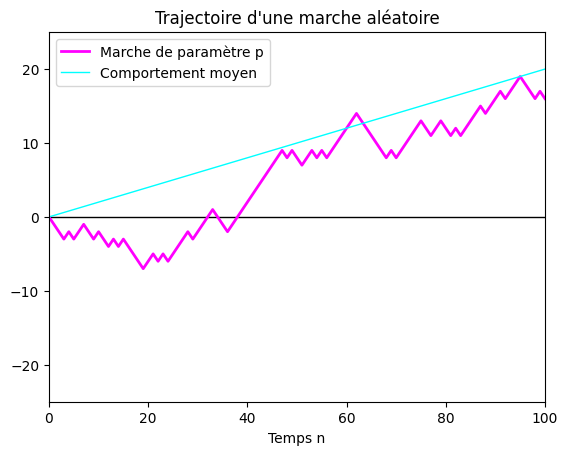

In [12]:
def marche(p,n):
    X=range(n+1)
    Y=[0]
    for i in range(n):
        Y.append(Y[-1]+pas(p))

    # On centre la fenêtre autour de la trajectoire, de façon symétrique
    M=int(1.3*max(max(Y),-min(Y)))+1
    plt.ylim(-M,M)

    plt.xlim(0,n)
    plt.axhline(0,color='black',linewidth=1)
    plt.plot(X,Y,color='magenta',linewidth=2,label='Marche de paramètre p')
    plt.plot([0,n],[0,n*(2*p-1)],color='cyan',linewidth=1,label='Comportement moyen')
    plt.legend()
    plt.xlabel('Temps n')
    plt.title("Trajectoire d'une marche aléatoire")
    return None

marche(.6,100)

4. Écrire une fonction `comparatif(n)` qui superpose des trajectoires de la marche aléatoire jusqu'au temps $n$ pour les paramètres $p\in\{0.1,0.2,\dots,0.9\}$.

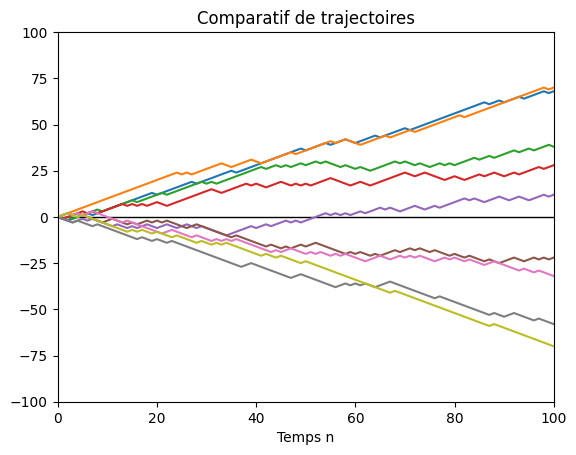

In [13]:
# Marches indépendantes

def comparatif(n):
    X=range(n+1)
    Y=[[0] for j in range(9)]
    
    for i in range(n):
        for j in range(9):
            (Y[j]).append(Y[j][-1]+pas((j+1)/10))
               
    plt.xlim(0,n)
    plt.ylim(-n,n)
    plt.axhline(0,color='black',linewidth=1)
    for j in range(8,-1,-1):
        plt.plot(X,Y[j]) # label='Marche de paramètre '+str((j+1)/10)
    plt.xlabel('Temps n')
    plt.title("Comparatif de trajectoires")
    return None

comparatif(100)

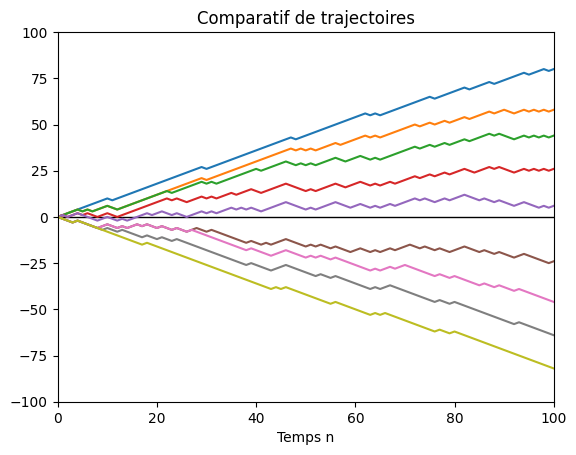

In [14]:
# Marches avec couplage monotone

def comparatif_monotone(n):
    X=range(n+1)
    Y=[[0] for j in range(9)]
    
    for i in range(n):
        s = rnd.random()
        for j in range(9):
            if s<(j+1)/10:
                (Y[j]).append(Y[j][-1]+1)
            else:
                (Y[j]).append(Y[j][-1]-1)
               
    plt.xlim(0,n)
    plt.ylim(-n,n)
    plt.axhline(0,color='black',linewidth=1)
    for j in range(8,-1,-1):
        plt.plot(X,Y[j]) # label='Marche de paramètre '+str((j+1)/10)
    plt.xlabel('Temps n')
    plt.title("Comparatif de trajectoires")
    return None

comparatif_monotone(100)

## Problème : Analyse de texte par chaînes de Markov

On s'intéresse désormais à la question de génération automatique de texte. Il existe de nos jours des modèles génératifs très aboutis comme [GPT-3](https://fr.wikipedia.org/wiki/GPT-3), dont la version antérieure a par exemple servi pour le jeu textuel interactif [AI Dungeon 2](https://fr.wikipedia.org/wiki/AI_Dungeon_2).

On va ici mettre en œuvre une version très naïve basée sur des chaînes de Markov. Pour ce faire, on va considérer un texte comme une succession $\left(T_n\right)$ de lettres de `a` à `z` (en miniscule, sans accentuation, qu'on identifiera aux nombres entiers de $1$ à $26$) et d'espaces ` ` (qu'on identifiera à $0$), en négligeant les apostrophes, guillemets, et la ponctuation.

En supposant que $\left(T_n\right)$ est la trajectoire d'une chaîne de Markov, on peut alors utiliser le théorème ergodique pour estimer $P$ la matrice stochastique de transition associée.

### Partie 1 : Génération de texte

1. Écrire une fonction `indice(c)` qui retourne l'entier associé à la lettre ou l'espace `c`. Écrire une fonction `lettre(i)` qui retourne la lettre ou l'espace associé à l'entier `i`. On pourra pour ce faire utiliser les fonctions `chr` et `ord`.

In [15]:
def indice(c):
    if c==' ':
        return 0
    else:
        return ord(c)-ord('a')+1
    
def lettre(i):
    if i:
        return chr(ord('a')+i-1)
    else:
        return ' '

2. Écrire une fonction `noyau(L)` qui, étant donné `L` une chaîne de caractères, retourne la matrice de transition empirique associée.

In [16]:
def noyau(L):
    X=[indice(c) for c in L]
    P=np.zeros((27,27))
    n=len(L)-1
    for i in range(n):
        P[X[i],X[i+1]]+=1
        
    for j in range(27):
        s = sum(P[j])
        if s>0:
            P[j] = P[j] / s
    
    return np.asmatrix(P)

3. Le fichier `fr.txt` joint contient un exemple de texte en langue française. Utiliser ce fichier pour générer une matrice de transition. On pourra notamment utiliser l'instruction `open('tp3/fr.txt','r').readline()` pour charger le contenu du fichier dans une chaîne de caractères.

In [17]:
with open('tp3/fr.txt','r') as f:
    L=f.readline()

Q=noyau(L)

4. À partir de la fonction `trajectoire(P,n)` (codée à l'exercice 1.1.2), définir une fonction `sample(P,n)` qui convertit la trajectoire générée aléatoirement en chaîne de $n$ caractères.

In [18]:
def sample(P,n):
    C = ''
    for i in trajectoire(P,n)[1:]:
        C+=lettre(i)
    return(C)

5. Écrire une fonction `sample_multi(lang,n)` qui génère une chaîne de caractères comme à la question précédente, de longueur $n$, mais en se basant sur l'échantillon de texte inclus dans le fichier `lang` (par exemple, si `lang='fr'`, on veut ouvrir `fr.txt`).

In [19]:
def sample_multi(lang='fr',n=500):
    with open('tp3/'+lang+'.txt','r') as f:
        L=f.readline()
    Q=noyau(L)
    return sample(Q,n)

6. Que pensez-vous des résultats ? Quelles améliorations pouvez-vous suggérer ?

On constate que les exemples générés sont difficilement prononçables, et rien de plus, quelque soit la langue de référence utilisée. Pour améliorer la génération, on pourrait par exemple utiliser plus de lettres dans le passé de la chaîne pour générer $X_n$, puisque les phonèmes en alphabet latin sont souvent constitués d'un groupe de 2 à 5 lettres.

### Partie 2 : Détection de langue

On a à notre disposition un échantillon de texte en français (`fr`), anglais (`en`), allemand (`de`), espagnol (`es`) et italien (`it`). Écrire une fonction `detect(file)` qui, étant donné un fichier `file`, retourne la langue la plus plausible, celle pour laquelle la matrice empirique de transitions est la plus proche en norme euclidienne de celle de l'entrée. 2. Quelle est la langue du fichier `mystere.txt` ?

In [20]:
def detect(file):

    with open('tp3/'+file+'.txt','r') as f:
        P = noyau(f.readline())
    
    DICTIONARY=['fr','en','de','es','it']
    
    Qlist = {}
    for lang in DICTIONARY:
        with open('tp3/'+lang+'.txt','r') as f:
            Qlist[lang]= noyau(f.readline())
        
    Dlist = {}
    for lang in DICTIONARY:
        Dlist[lang] = np.linalg.norm(P-Qlist[lang])
        
    return min(Dlist,key=Dlist.get)

print("La langue du fichier mystère est : "+detect('mystere'))

La langue du fichier mystère est : de


### Bonus : Création de nouveaux échantillons

Notre hypothèse de départ sur l'alphabet (a-z et l'espace) rend impossible la tâche de trouver des documents utilisables en l'état. Vous pouvez utiliser le convertisseur suivant pour générer un échantillon analysable à partir d'un fichier texte quelconque.

In [21]:
from unidecode import unidecode

def cleanup(file):
    
    # Ouverture du fichier et suppression des sauts de ligne
    with open('tp3/'+file+'.txt','r') as f:
        L = " ".join(line.strip() for line in f)
        
    # Suppression des accents
    L = unidecode(L)

    # Remplacement des apostrophes par des espaces
    L = L.replace("'"," ")

    # Suppression de la capitalisation des lettres
    for i in range(26):
        L = L.replace(chr((ord('A')+i)),chr(ord('a')+i))

    # Suppression de la ponctuation et des autres symboles
    S=set()
    for c in L:
        if c != ' ' and (ord(c) < ord('a') or ord(c) > ord('z')):
            S.add(c)
    for c in S:
        L = L.replace(c,' ')

    # Suppression des espaces en double
    L = " ".join(L.split())
    
    # Sauvegarde du résultat
    with open(file+'.txt','w') as f:
        f.write(L)
        
    return None

Les échantillons de référence ont notamment été ainsi convertis à partir de la déclaration des droits de l'homme, [facilement accessible en ligne en version multilingue](https://www.lexilogos.com/declaration/index.htm). Le texte mystère, lui, est tiré de la page wikipedia d'un jeu dans lequel on passe notoirement [un mauvais moment](https://de.wikipedia.org/wiki/Undertale).